# Teorema degli zeri

Sia $f : [a, b] \to \mathbb{R}$, $f$ sia continua  
supponiamo che  
$f(a) < 0$ e $f(b) > 0$  
oppure  
$f(a) > 0$ e $f(b) < 0$  
(cioè $f(a) f(b) < 0$)

Allora $\exists \xi \in ]a, b[$ tale che $f(\xi) = 0$

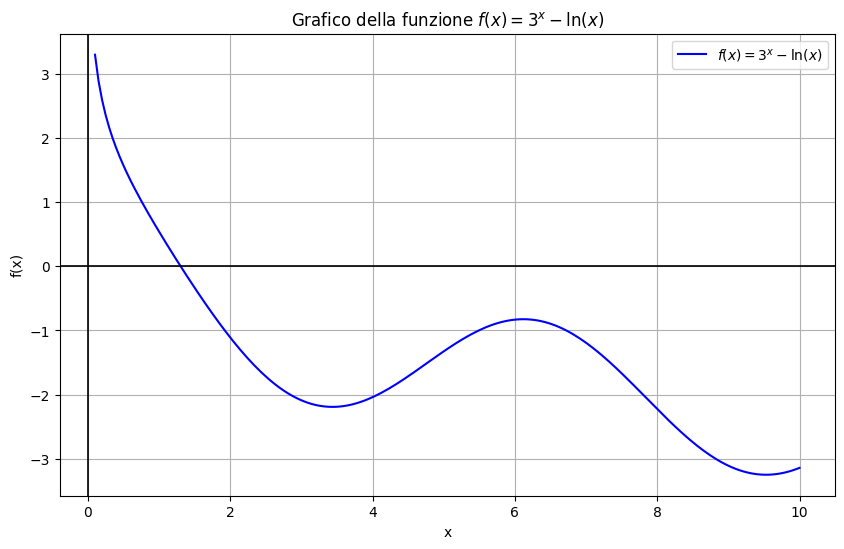

In [20]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return np.cos(x) - np.log(x)


x = np.linspace(0.1, 10, 200)
y = f(x)


plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$f(x) = 3^x - \ln(x)$', color='blue')
# plt.scatter(1, 1, color='red', label='$f(x) = 0$')

plt.title('Grafico della funzione $f(x) = 3^x - \ln(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=1.2)
plt.axvline(0, color='black', linewidth=1.2)
plt.legend()
plt.show()

**Dimostrazione**  
Supponiamo $f(a) < 0$, $f(b) = 0$

chiamo $a = a_0$ e $b = b_0$  
considero $c_0 = \frac{a_0 + b_0}{2}$  
considero $f(c_0)$  
ho 3 possibilità:

- $f(c_0) < 0$  
- $f(c_0) = 0$  
- $f(c_0) > 0$

se $f(c_0) = 0$ allora ho finito

se $f(c_0) > 0$ allora guardo la funzione in $[a_0, c_0]$  
$f(a_0) < 0, f(c_0) > 0$  
chiamo $a_1 = a_0$ e $b_1 = c_0$  

se $f(c_0) < 0$ allora guardo la funzione in $[c_0, b_0]$  
$f(c_0) < 0, f(b_0) > 0$  
chiamo $a_1 = c_0$ e $b_1 = b_0$  

considero $c_1 = \frac{a_1 + b_1}{2}$  
considero $f(c_1)$  
ho 3 possibilità:

- $f(c_1) < 0$  
- $f(c_1) = 0$  
- $f(c_1) > 0$

se $f(c_1) = 0$ allora ho finito

se $f(c_1) > 0 \Rightarrow a_2 = a_1, b_2 = c_1$

se $f(c_1) < 0 \Rightarrow a_2 = c_1, b_2 = b_1$

considero $[a_2, b_2]$ e così via

Questa procedura si ferma dopo $k$ passi perché $f(c_k) = 0$, oppure  

costruisco una successione di intervalli chiusi, limitati, inscatolati e dimezzati $([a_n, b_n])_n$  
in cui $f(a_n) < 0, f(b_n) > 0$  

uso Cantor forte  
$\exists \xi \in [a, b]: \bigcap\limits_n [a_n, b_n] = \{ \xi \}$

Per concludere basta provare che $f(\xi) = 0$  
osservo che  
$|\xi - a_n| \leq |b_n - a_n| = \frac{b_0 - a_0}{2^n}$ tende a zero

quindi $\lim\limits_n a_n = \xi$  
analogamente $\lim\limits_n b_n = \xi$

$f$ è continua, allora  
$\lim\limits_n f(a_n) = f(\xi)$  
$\lim\limits_n f(b_n) = f(\xi)$

però $f(a_n) < 0, \forall n \Rightarrow \lim\limits_n f(a_n) \leq 0 \Rightarrow f(\xi) \leq 0$  
e $f(b_n) > 0, \forall n \Rightarrow \lim\limits_n f(b_n) \geq 0 \Rightarrow f(\xi) \geq 0$

$f(\xi) \geq 0 \wedge f(\xi) \leq 0 \Rightarrow f(\xi) = 0$

$\square$

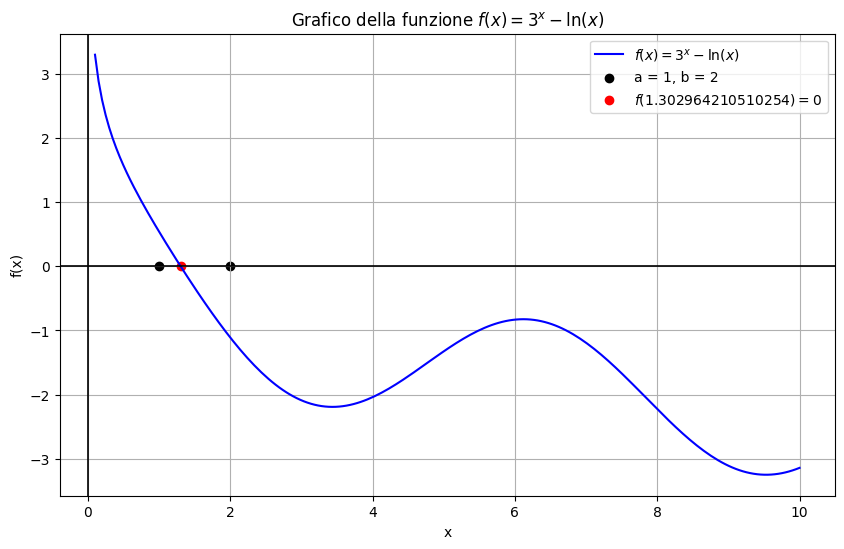

In [24]:
def metodo_della_bisezione(f, a, b, tolleranza=1e-6, iterazioni_massime=1000):
    assert f(a) * f(b) < 0, "Il segno della funzione non cambia nell'intervallo."

    iterazioni = 0
    while iterazioni < iterazioni_massime:
        c = (a + b) / 2
        if abs(f(c)) < tolleranza:
            return c
        if f(c) == 0:
            return c
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        iterazioni += 1

    return (a + b) / 2

a, b = 1, 2
xi = metodo_della_bisezione(f, a, b)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$f(x) = 3^x - \ln(x)$', color='blue')
plt.scatter((a, b), (0, 0), color='black', label = f'a = {a}, b = {b}')
plt.scatter(xi, f(xi), color='red', label=f'$f({xi}) = 0$')

plt.title('Grafico della funzione $f(x) = 3^x - \ln(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=1.2)
plt.axvline(0, color='black', linewidth=1.2)
plt.legend()
plt.show()

Iterazione 0:
    a0 = 1, f(a0) = 0.5403023058681398
    b0 = 2, f(b0) = -1.1092940171070877
    c0 = 1.5, f(c0) = -0.33472790644046146

Iterazione 1:
    a1 = 1, f(a1) = 0.5403023058681398
    b1 = 1.5, f(b1) = -0.33472790644046146
    c1 = 1.25, f(c1) = 0.09217881108105891

Iterazione 2:
    a2 = 1.25, f(a2) = 0.09217881108105891
    b2 = 1.5, f(b2) = -0.33472790644046146
    c2 = 1.375, f(c2) = -0.1239060231295474

Iterazione 3:
    a3 = 1.25, f(a3) = 0.09217881108105891
    b3 = 1.375, f(b3) = -0.1239060231295474
    c3 = 1.3125, f(c3) = -0.01649994859483006

Iterazione 4:
    a4 = 1.25, f(a4) = 0.09217881108105891
    b4 = 1.3125, f(b4) = -0.01649994859483006
    c4 = 1.28125, f(c4) = 0.03768130221763846

Iterazione 5:
    a5 = 1.28125, f(a5) = 0.03768130221763846
    b5 = 1.3125, f(b5) = -0.01649994859483006
    c5 = 1.296875, f(c5) = 0.010551112470620905

Iterazione 6:
    a6 = 1.296875, f(a6) = 0.010551112470620905
    b6 = 1.3125, f(b6) = -0.01649994859483006
    c6 = 1.304687

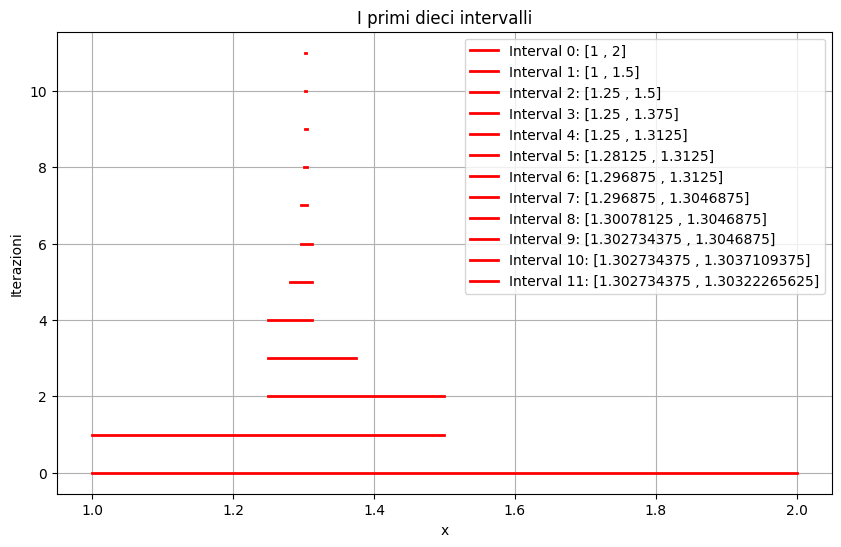

In [38]:
def metodo_della_bisezione_verbose(f, a, b, iterazioni_massime=11):
    assert f(a) * f(b) < 0, "Il segno della funzione non cambia nell'intervallo."

    iterazioni = 0
    intervalli = [(a, b)]

    while iterazioni < iterazioni_massime:
        c = (a + b) / 2

        print(f"Iterazione {iterazioni}:")
        print(f"    a{iterazioni} = {a}, f(a{iterazioni}) = {f(a)}")
        print(f"    b{iterazioni} = {b}, f(b{iterazioni}) = {f(b)}")
        print(f"    c{iterazioni} = {c}, f(c{iterazioni}) = {f(c)}\n")

        if f(c) == 0:
            print("Radice esatta trovata.")
            return c, intervalli

        if f(c) * f(a) < 0:
            b = c
        else:
            a = c

        intervalli.append((a, b))
        iterazioni += 1

    return (a + b) / 2, intervalli


a, b = 1, 2
xi, intervalli = metodo_della_bisezione_verbose(f, a, b)

plt.figure(figsize=(10, 6))
for i, interval in enumerate(intervalli):
    plt.plot(interval, [i, i], color='red', linewidth=2, label=f'Interval {i}: [{interval[0]} , {interval[1]}]')

plt.title('I primi dieci intervalli')
plt.xlabel('x')
plt.ylabel('Iterazioni')
plt.grid(True)
plt.legend()
plt.show()